# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [2]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [3]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


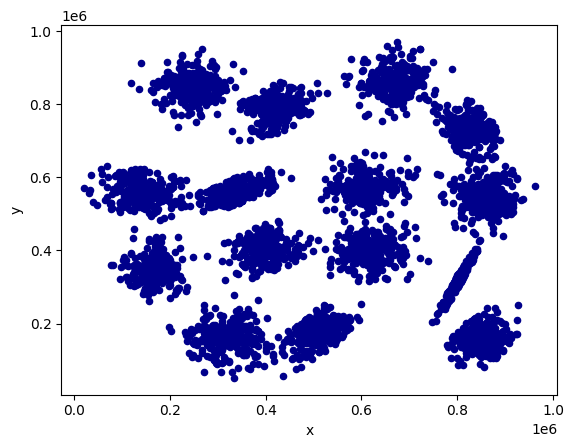

In [4]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

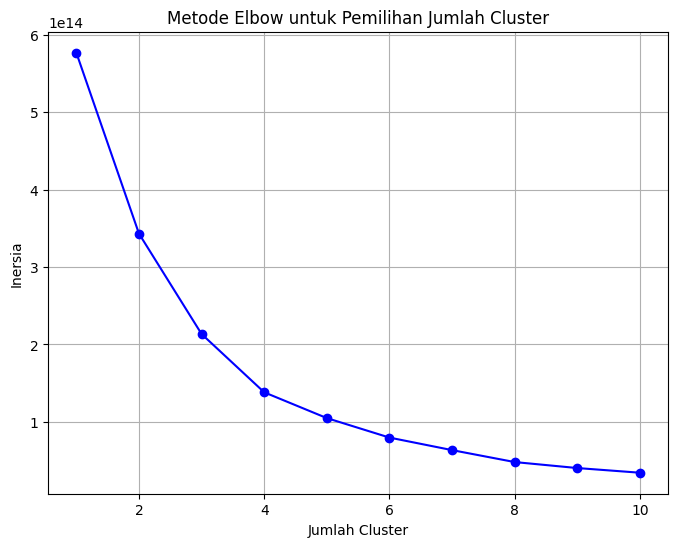

In [8]:
# clustering menggunakan metode elbow

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mencari jumlah cluster terbaik menggunakan metode Elbow
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Mengatur n_init secara eksplisit
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot nilai inersia untuk berbagai jumlah cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Pemilihan Jumlah Cluster')
plt.grid(True)
plt.show()

In [7]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik menggunakan fungsi silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menyimpan nilai Silhouette Score terbaik
best_score = -1
best_k = 0

# Mencari jumlah cluster terbaik
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Menambahkan pengaturan n_init
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)

    if score > best_score:
        best_score = score
        best_k = k

# Mencetak hasil evaluasi jumlah cluster terbaik
print("Jumlah Cluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Cluster Terbaik: 10
Silhouette Score Terbaik: 0.5992416200674553


## Proses Visualisasi hasil CLuster

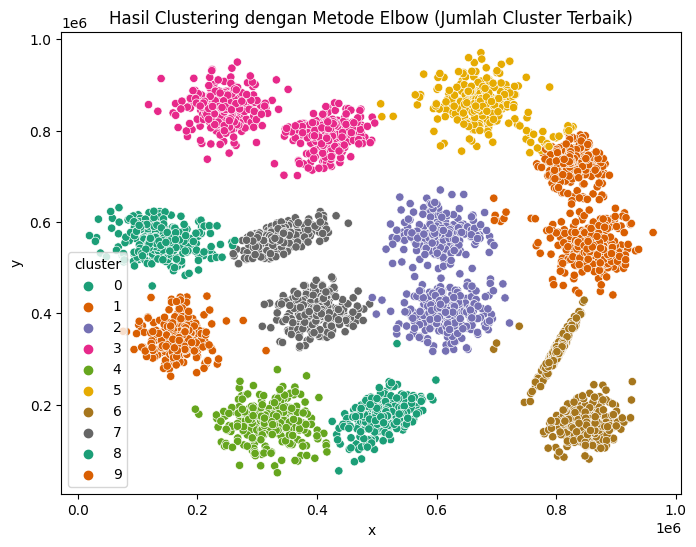

In [9]:
# #Proses Visualisasi hasil cluster

# Pertama, masukkan dahulu label hasil clustering ke dalam data
result = data.copy()
result['cluster'] = kmeans.labels_  # Memasukkan label hasil clustering

# Sekarang, Anda dapat melakukan visualisasi hasil clustering
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=result, x='x', y='y', hue='cluster', palette='Dark2')
plt.title('Hasil Clustering dengan Metode Elbow (Jumlah Cluster Terbaik)')
plt.show()


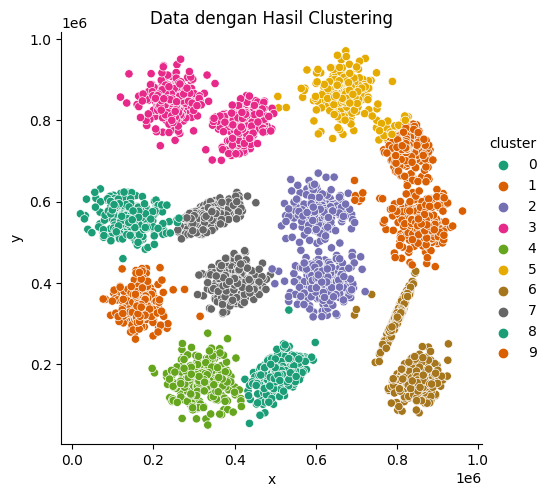

In [10]:
# #Lakukan Plotting terhadap data

import seaborn as sns

# Lakukan Plotting terhadap data
sns.relplot(data=result, x='x', y='y', hue='cluster', palette='Dark2')
plt.title('Data dengan Hasil Clustering')
plt.show()